In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [94]:
recife = pd.read_csv('base de dados/station_recife.csv')
curitiba = pd.read_csv('base de dados/station_curitiba.csv')
rio = pd.read_csv('base de dados/station_rio.csv')
saoPaulo = pd.read_csv('base de dados/station_sao_paulo.csv')
vitoria = pd.read_csv('base de dados/station_vitoria.csv')
goiania = pd.read_csv('base de dados/station_goiania.csv')
salvador = pd.read_csv('base de dados/station_salvador.csv')
manaus = pd.read_csv('base de dados/station_manaus.csv')
macapa = pd.read_csv('base de dados/station_macapa.csv')
fortaleza = pd.read_csv('base de dados/station_fortaleza.csv')
belem = pd.read_csv('base de dados/station_belem.csv')
#saoLuiz = pode.read_csv()

listaCidades = ['Recife','Salvador','Fortaleza','São Paulo','Rio de Janeiro','Vitória','Belém','Manaus','Macapá','Curitiba','Goiania']
cidades = [recife, salvador, fortaleza, saoPaulo, rio, vitoria, belem, manaus, macapa, curitiba, goiania]


<h1>Funções utilizadas:

In [59]:
#Katz----------------------------------------------------------------
def tirarmeses(cid):
    for i in cid:
        for j in range(1,cid.shape[0]):
            if cid[i][j] == 999.90:
                cid[i][j] = cid['metANN'][j]
    return(cid)

#Katz----------------------------------------------------------------

def tirar999(cid):
    j = 0
    for i in cid['metANN']:
        if  i == 999.9:
            cid = cid.drop(j)
        j += 1
    return cid

#Função que retira dados de anos anteriores a 1975-------------------

def ClearBF75(df):
    c = 0
    for i in df['YEAR']:
        if i < 1975:
            df = df.drop(c)
        else:
            break
        c = c + 1
    return df

#Função que estima populçao de 1976 ate 1989-------------------------

def Pop76_89(v1, v2):
    delta = v2 - v1
    #76 - 89 ///// 14 anos
    inc = delta/15
    r = []
    for i in range(14):
        r.append(math.floor(v1 + (inc * (i+1))))
    return r

#Funçoes para estimar populção nos anos faltosos----------------------

def MsYpop(df):
    aux = pd.DataFrame()
    l = []
    for i in range(len(df['Ano'])-2):
        if df['Ano'][i] != (df['Ano'][i+1] - 1):
            l.append(MsYpop2(df,i,i+1))
    return l
    
            

def MsYpop2(df, a, b):
    l = []
    l.append(df["Ano"][a]+1)
    for i in listaCidades:
        x = (df[i][a] + df[i][b])/2
        x = math.floor(x)
        l.append(x)
    return l

<h1>Formatção das tabelas de temperatura

In [73]:
recife = recife.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
curitiba = curitiba.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
belem = belem.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
fortaleza = fortaleza.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
rio = rio.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
saoPaulo = saoPaulo.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
vitoria = vitoria.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
salvador= salvador.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
manaus = manaus.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
macapa = macapa.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])
goiania = goiania.drop(columns = ['D-J-F','M-A-M','J-J-A', 'S-O-N'])

##############################################


recife = tirarmeses(recife)
curitiba = tirarmeses(curitiba)
belem = tirarmeses(belem)
rio = tirarmeses(rio)
saoPaulo = tirarmeses(saoPaulo)
vitoria = tirarmeses(vitoria)
salvador= tirarmeses(salvador)
manaus = tirarmeses(manaus)
macapa = tirarmeses(macapa)
goiania = tirarmeses(goiania)
fortaleza = tirarmeses(fortaleza)

##############################################


recife = tirar999(recife)
curitiba = tirar999(curitiba)
belem = tirar999(belem)
rio = tirar999(rio)
saoPaulo = tirar999(saoPaulo)
vitoria = tirar999(vitoria)
salvador = tirar999(salvador)
manaus = tirar999(manaus)
macapa = tirar999(macapa)
goiania = tirar999(goiania)
fortaleza = tirar999(fortaleza)

##############################################

recife = recife[recife['YEAR']>=1973]
curitiba = curitiba[curitiba['YEAR']>=1973]
belem = belem[belem['YEAR']>=1973]
rio = rio[rio['YEAR']>=1973]
saoPaulo = saoPaulo[saoPaulo['YEAR']>=1973]
vitoria = vitoria[vitoria['YEAR']>=1973]
salvador  = salvador[salvador['YEAR']>=1973]
manaus = manaus[manaus['YEAR']>=1973]
macapa = macapa[macapa['YEAR']>=1973]
goiania = goiania[goiania['YEAR'] >= 1972]
fortaleza = fortaleza[fortaleza['YEAR'] >= 1972]

/home/daniel/anaconda3/envs/envCesar/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


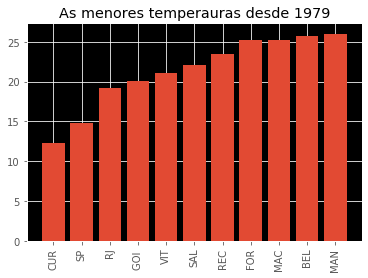

In [75]:
min_temp = []
cidades = [curitiba,saoPaulo,rio,goiania ,vitoria,salvador,recife,fortaleza ,macapa,belem,manaus]
cn = ['CUR','SP','RJ','GOI ','VIT','SAL','REC','FOR','MAC','BEL','MAN']
for x in cidades: min_temp.append(x.min().min())
plt.title('As menores temperauras desde 1979')
plt.style.use('ggplot')
plt.bar(cn, min_temp)
plt.xticks(rotation = 90)
plt.rcParams['axes.facecolor'] = 'black'

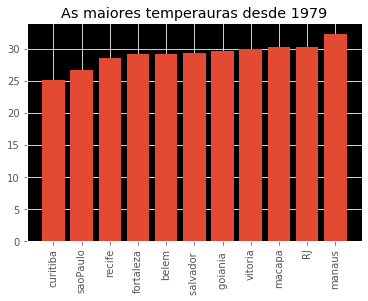

In [76]:
max_temp = []
cidades = [curitiba,saoPaulo,recife,fortaleza,belem,salvador ,goiania ,vitoria,macapa,rio,manaus]
cn = ['curitiba','saoPaulo','recife','fortaleza','belem','salvador ','goiania ','vitoria','macapa','RJ','manaus']
for x in cidades: max_temp.append(x.drop(columns = 'YEAR').max().max())
plt.title('As maiores temperauras desde 1979')
plt.style.use('ggplot')
plt.bar(cn, max_temp)
plt.xticks(rotation = 90)
plt.rcParams['axes.facecolor'] = 'black'

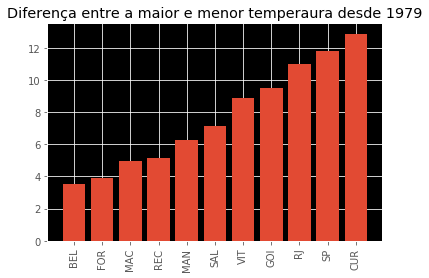

In [77]:
dif_de_temp = []
cidades = [belem,fortaleza,macapa,recife,manaus,salvador ,vitoria,goiania ,rio,saoPaulo,curitiba]
cn = ['BEL','FOR','MAC','REC','MAN','SAL','VIT','GOI','RJ','SP','CUR']
for x in cidades: dif_de_temp.append(x.drop(columns = 'YEAR').max().max() - x.min().min())
plt.title('Diferença entre a maior e menor temperaura desde 1979')
plt.style.use('ggplot')
plt.bar(cn, dif_de_temp)
plt.xticks(rotation = 90)
plt.rcParams['axes.facecolor'] = 'black'

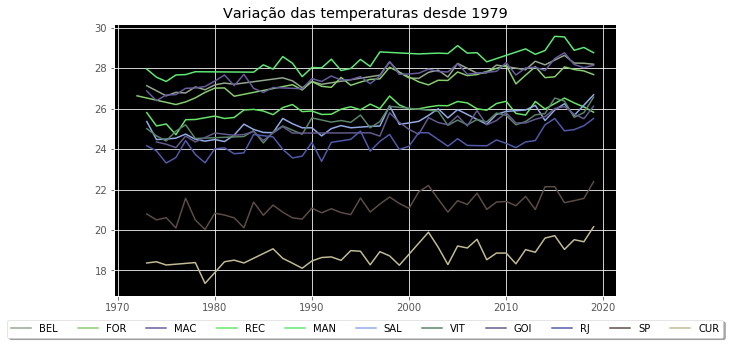

In [79]:
j = 0
fig = plt.figure()
for i in cidades:
    ci1 = i['YEAR']
    ci2 = i['metANN']
    plt.plot(ci1, ci2, label = cn[j], color = (np.random.uniform(0.25, 1), np.random.uniform(0.25, 1), np.random.uniform(0.25, 1)))# , marker = '+', s = 30)
    j += 1
plt.title('Variação das temperaturas desde 1979')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), shadow=True, ncol=11)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (9,5)

<h1> 

In [80]:
recI=((recife['JUL']+recife['AUG']+recife['SEP'])/3).max()-((recife['JUL']+recife['AUG']+recife['SEP'])/3).min()
recV=((recife['JAN']+recife['FEB']+recife['MAR'])/3).max()-((recife['JAN']+recife['FEB']+recife['MAR'])/3).min()
recO=((recife['APR']+recife['MAY']+recife['MAR'])/3).max()-((recife['APR']+recife['MAY']+recife['JUN'])/3).min()
recP=((recife['DEC']+recife['NOV']+recife['OCT'])/3).max()-((recife['DEC']+recife['NOV']+recife['OCT'])/3).min()
curI=((curitiba['JUL']+curitiba['AUG']+curitiba['SEP'])/3).max()-((curitiba['JUL']+curitiba['AUG']+curitiba['SEP'])/3).min()
curV=((curitiba['JAN']+curitiba['FEB']+curitiba['MAR'])/3).max()-((curitiba['JAN']+curitiba['FEB']+curitiba['MAR'])/3).min()
curO=((curitiba['APR']+curitiba['MAY']+curitiba['MAR'])/3).max()-((curitiba['APR']+curitiba['MAY']+curitiba['JUN'])/3).min()
curP=((curitiba['DEC']+curitiba['NOV']+curitiba['OCT'])/3).max()-((curitiba['DEC']+curitiba['NOV']+curitiba['OCT'])/3).min()
spI=((saoPaulo['JUL']+saoPaulo['AUG']+saoPaulo['SEP'])/3).max()-((saoPaulo['JUL']+saoPaulo['AUG']+saoPaulo['SEP'])/3).min()
spV=((saoPaulo['JAN']+saoPaulo['FEB']+saoPaulo['MAR'])/3).max()-((saoPaulo['JAN']+saoPaulo['FEB']+saoPaulo['MAR'])/3).min()
spO=((saoPaulo['APR']+saoPaulo['MAY']+saoPaulo['MAR'])/3).max()-((saoPaulo['APR']+saoPaulo['MAY']+saoPaulo['JUN'])/3).min()
spP=((saoPaulo['DEC']+saoPaulo['NOV']+saoPaulo['OCT'])/3).max()-((saoPaulo['DEC']+saoPaulo['NOV']+saoPaulo['OCT'])/3).min()
vitI=((vitoria['JUL']+vitoria['AUG']+vitoria['SEP'])/3).max()-((vitoria['JUL']+vitoria['AUG']+vitoria['SEP'])/3).min()
vitV=((vitoria['JAN']+vitoria['FEB']+vitoria['MAR'])/3).max()-((vitoria['JAN']+vitoria['FEB']+vitoria['MAR'])/3).min()
vitO=((vitoria['APR']+vitoria['MAY']+vitoria['MAR'])/3).max()-((vitoria['APR']+vitoria['MAY']+vitoria['JUN'])/3).min()
vitP=((vitoria['DEC']+vitoria['NOV']+vitoria['OCT'])/3).max()-((vitoria['DEC']+vitoria['NOV']+vitoria['OCT'])/3).min()
goiI=((goiania['JUL']+goiania['AUG']+goiania['SEP'])/3).max()-((goiania['JUL']+goiania['AUG']+goiania['SEP'])/3).min()
goiV=((goiania['JAN']+goiania['FEB']+goiania['MAR'])/3).max()-((goiania['JAN']+goiania['FEB']+goiania['MAR'])/3).min()
goiO=((goiania['APR']+goiania['MAY']+goiania['MAR'])/3).max()-((goiania['APR']+goiania['MAY']+goiania['JUN'])/3).min()
goiP=((goiania['DEC']+goiania['NOV']+goiania['OCT'])/3).max()-((goiania['DEC']+goiania['NOV']+goiania['OCT'])/3).min()
salI=((salvador['JUL']+salvador['AUG']+salvador['SEP'])/3).max()-((salvador['JUL']+salvador['AUG']+salvador['SEP'])/3).min()
salV=((salvador['JAN']+salvador['FEB']+salvador['MAR'])/3).max()-((salvador['JAN']+salvador['FEB']+salvador['MAR'])/3).min()
salO=((salvador['APR']+salvador['MAY']+salvador['MAR'])/3).max()-((salvador['APR']+salvador['MAY']+salvador['JUN'])/3).min()
salP=((salvador['DEC']+salvador['NOV']+salvador['OCT'])/3).max()-((salvador['DEC']+salvador['NOV']+salvador['OCT'])/3).min()
manI=((manaus['JUL']+manaus['AUG']+manaus['SEP'])/3).max()-((manaus['JUL']+manaus['AUG']+manaus['SEP'])/3).min()
manV=((manaus['JAN']+manaus['FEB']+manaus['MAR'])/3).max()-((manaus['JAN']+manaus['FEB']+manaus['MAR'])/3).min()
manO=((manaus['APR']+manaus['MAY']+manaus['MAR'])/3).max()-((manaus['APR']+manaus['MAY']+manaus['JUN'])/3).min()
manP=((manaus['DEC']+manaus['NOV']+manaus['OCT'])/3).max()-((manaus['DEC']+manaus['NOV']+manaus['OCT'])/3).min()
macI=((macapa['JUL']+macapa['AUG']+macapa['SEP'])/3).max()-((macapa['JUL']+macapa['AUG']+macapa['SEP'])/3).min()
macV=((macapa['JAN']+macapa['FEB']+macapa['MAR'])/3).max()-((macapa['JAN']+macapa['FEB']+macapa['MAR'])/3).min()
macO=((macapa['APR']+macapa['MAY']+macapa['MAR'])/3).max()-((macapa['APR']+macapa['MAY']+macapa['JUN'])/3).min()
macP=((macapa['DEC']+macapa['NOV']+macapa['OCT'])/3).max()-((macapa['DEC']+macapa['NOV']+macapa['OCT'])/3).min()
forI=((fortaleza['JUL']+fortaleza['AUG']+fortaleza['SEP'])/3).max()-((fortaleza['JUL']+fortaleza['AUG']+fortaleza['SEP'])/3).min()
forV=((fortaleza['JAN']+fortaleza['FEB']+fortaleza['MAR'])/3).max()-((fortaleza['JAN']+fortaleza['FEB']+fortaleza['MAR'])/3).min()
forO=((fortaleza['APR']+fortaleza['MAY']+fortaleza['MAR'])/3).max()-((fortaleza['APR']+fortaleza['MAY']+fortaleza['JUN'])/3).min()
forP=((fortaleza['DEC']+fortaleza['NOV']+fortaleza['OCT'])/3).max()-((fortaleza['DEC']+fortaleza['NOV']+fortaleza['OCT'])/3).min()
belI=((belem['JUL']+belem['AUG']+belem['SEP'])/3).max()-((belem['JUL']+belem['AUG']+belem['SEP'])/3).min()
belV=((belem['JAN']+belem['FEB']+belem['MAR'])/3).max()-((belem['JAN']+belem['FEB']+belem['MAR'])/3).min()
belO=((belem['APR']+belem['MAY']+belem['MAR'])/3).max()-((belem['APR']+belem['MAY']+belem['JUN'])/3).min()
belP=((belem['DEC']+belem['NOV']+belem['OCT'])/3).max()-((belem['DEC']+belem['NOV']+belem['OCT'])/3).min()
rjI=((rio['JUL']+rio['AUG']+rio['SEP'])/3).max()-((rio['JUL']+rio['AUG']+rio['SEP'])/3).min()
rjV=((rio['JAN']+rio['FEB']+rio['MAR'])/3).max()-((rio['JAN']+rio['FEB']+rio['MAR'])/3).min()
rjO=((rio['APR']+rio['MAY']+rio['MAR'])/3).max()-((rio['APR']+rio['MAY']+rio['JUN'])/3).min()
rjP=((rio['DEC']+rio['NOV']+rio['OCT'])/3).max()-((rio['DEC']+rio['NOV']+rio['OCT'])/3).min()

In [81]:
winter=[recI,spI,rjI,macI,manI,forI,belI,salI,goiI,vitI,curI]
summer=[recV,spV,rjV,macV,manV,forV,belV,salV,goiV,vitV,curV]
autumn=[recO,spO,rjO,macO,manO,forO,belO,salO,goiO,vitO,curO]
spring=[recP,spP,rjP,macP,manP,forP,belP,salP,goiP,vitP,curP]

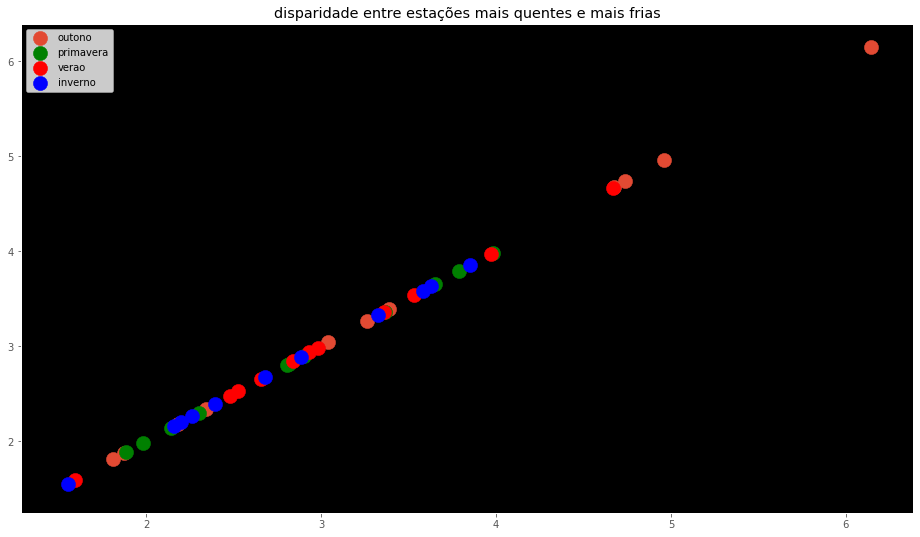

In [91]:
plt.scatter(autumn,autumn,label = 'outono', s = 200)
plt.scatter(spring,spring,label = 'primavera', c = 'g', s = 200)
plt.scatter(summer,summer,label = 'verao', c = 'r', s = 200)
plt.scatter(winter,winter,label = 'inverno', c = 'b', s = 200)
plt.plot()
plt.legend()
plt.grid()
plt.title('disparidade entre estações mais quentes e mais frias')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['figure.figsize']=(16,9)

<h1>limpa as planilhas na lista

In [95]:
for i in range(len(cidades)):
    cidades[i] = tirarmeses(cidades[i])

for i in range(len(cidades)):
    cidades[i] = cidades[i].drop(columns=['D-J-F','M-A-M','J-J-A', 'S-O-N'])

for i in range(len(cidades)):
    cidades[i] = tirar999(cidades[i])
    
for i in range(len(cidades)):
    cidades[i] = cidades[i].reset_index(drop=True)


/home/daniel/anaconda3/envs/envCesar/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
#importação de planilha autoral do grupo criada a partir de dados retirados do IBGE
dadosAuxiliares = pd.read_csv('planilha complementar 2.csv')
dadosAuxiliares

,Cidade,Área da unidade territorial(km²),Arborização de vias públicas,Urbanização de vias públicas,Região,Clima,Bioma,Latitude
0,Recife,"218,843","60,5 %","49,6 %",Nordeste,tropical(As),Mata Atlantica,8° 3′ 14″ S
1,Fortaleza,"312,407","74,8 %","13,2 %",Nordeste,tropical semi-úmido (As),Caatinga,3°43′01″ S
2,Salvador,"693,831","39,5 %",35 %,Nordeste,tropical atlântico,Mata Atlântica,13° 0′ 0″ S
3,São Paulo,"1.521,110","74,8 %","50,3 %",Suldeste,subtropical úmido (Cfa),Mata Atlântica,23° 32′ 56″ S
4,Rio de Janeiro,"1.200,255","70,5 %","78,4 %",Suldeste,tropical atlântico (Aw),Mata Atlântica,22° 54′ 13″ S
5,Vitória,"97.123,000","65,4 %","78,7 %",Suldeste,tropical(As),Mata Atlântica,20° 19′ 08″ S
6,Belém,"1.059,458","96,6 %","26,9 %",Norte,Equatorial (Af),Amazônia,1° 27′ 18″ S
7,Manaus,"11.401,092","23,9 %","26,3 %",Norte,tropical úmido (Am),Amazônia,3° 6′ 26″ S
8,Macapá,"6.563,849",66 %,"8,8 %",Norte,equatorial (Af),Amazônia,0° 2′ 4″ N
9,Curitiba,"435.036,000","76,1 %","59,1 %",Sul,temperado oceânico (Cfb),Mata Atlântica,25° 25′ 42″ S


<h1>Adciona colunas para a media anual de temperatura de 2019 e a diferença historica de temperatura media anual

In [11]:
aux = []
aux2 = []
for i in range(len(cidades)):
    aux.append(cidades[i]['metANN'][len(cidades[i]['metANN'])-1])
    aux2.append(cidades[i]['metANN'][len(cidades[i]['metANN'])-1] - cidades[i]['metANN'][0])
    
dadosAuxiliares["metANN"] = aux
dadosAuxiliares["delta metANN"] = aux2

In [12]:
dadosAuxiliares

,Cidade,Área da unidade territorial(km²),Arborização de vias públicas,Urbanização de vias públicas,Região,Clima,Bioma,Latitude,metANN,delta metANN
0,Recife,"218,843","60,5 %","49,6 %",Nordeste,tropical(As),Mata Atlantica,8° 3′ 14″ S,25.82,1.41
1,Fortaleza,"312,407","74,8 %","13,2 %",Nordeste,tropical semi-úmido (As),Caatinga,3°43′01″ S,26.68,2.29
2,Salvador,"693,831","39,5 %",35 %,Nordeste,tropical atlântico,Mata Atlântica,13° 0′ 0″ S,27.68,1.79
3,São Paulo,"1.521,110","74,8 %","50,3 %",Suldeste,subtropical úmido (Cfa),Mata Atlântica,23° 32′ 56″ S,22.39,3.28
4,Rio de Janeiro,"1.200,255","70,5 %","78,4 %",Suldeste,tropical atlântico (Aw),Mata Atlântica,22° 54′ 13″ S,25.51,1.35
5,Vitória,"97.123,000","65,4 %","78,7 %",Suldeste,tropical(As),Mata Atlântica,20° 19′ 08″ S,26.56,1.60
6,Belém,"1.059,458","96,6 %","26,9 %",Norte,Equatorial (Af),Amazônia,1° 27′ 18″ S,28.19,1.81
7,Manaus,"11.401,092","23,9 %","26,3 %",Norte,tropical úmido (Am),Amazônia,3° 6′ 26″ S,28.76,1.21
8,Macapá,"6.563,849",66 %,"8,8 %",Norte,equatorial (Af),Amazônia,0° 2′ 4″ N,28.14,1.59
9,Curitiba,"435.036,000","76,1 %","59,1 %",Sul,temperado oceânico (Cfb),Mata Atlântica,25° 25′ 42″ S,20.16,1.30


<h1>Importação de planilha autoral do grupo criada a partir de dados retirados do site da fundação de estudo dos fenomenos El Niño e La Niña


In [58]:
elNino = pd.read_csv('el ninho _ la ninha.csv')
elNino

,ano,El Niño - w,El Niño - m,El Niño - s,El Niño - vs,La Niña - w,La Niña - m,La Niña - s
0,1951,0,1,0,0,0,0,0
1,1952,1,0,0,0,0,0,0
2,1953,1,0,0,0,0,0,0
3,1954,0,0,0,0,0,0,0
4,1955,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
64,2015,0,0,0,1,0,0,0
65,2016,0,0,0,0,1,0,0
66,2017,0,0,0,0,1,0,0
67,2018,1,0,0,0,0,0,0


<h1>importação de planilha autoral do grupo criada a partir de dados retirados do IBGE


In [15]:
popData = pd.read_csv('populacao cidades projeto cesar.csv')
popData

,Ano,Recife,Salvador,Fortaleza,São Paulo,Rio de Janeiro,Vitória,Belém,Manaus,Macapá,Curitiba,Goiania
0,1975,1249821,1237373,1109637,7198608,4857716,163877,771665,388811,108752,765716,518469
1,1990,1335684,2015392,1708741,9700111,5487346,276173,1235625,996716,166753,1248395,998471
2,1992,1303389,2110334,1796116,9727889,5508048,262742,1273825,1047232,173826,1337157,940757
3,1993,1314857,2174072,1846955,9842059,5547033,267448,1297592,1078277,179273,1364320,957564
4,1994,1322403,2218962,1882539,9931038,5577141,271389,1148242,1108612,184239,1386692,973626
5,1995,1329768,2262731,1917236,10017821,5606497,275227,1167841,1138198,189080,1408534,989285
6,1997,1357967,2245522,2014600,9887614,5569181,267646,1160181,1193727,233925,1516467,1022759
7,1998,1368029,2274167,2056285,9927868,5584067,269135,1173534,1224362,244972,1550317,1039230
8,1999,1378087,2302832,2097757,9968485,5598953,270626,1186926,1255049,256033,1584232,1056330
9,2000,1388193,2331612,2139372,10009231,5613897,272126,1200355,1285841,267140,1618279,1073490


<h1>Usa a função para estimar as populações nos anos entre 1975 e 1990


In [16]:
pop75_89 = pd.DataFrame()

pop75_89['Ano'] = [1976,1977,1978,1979,1980,1981,1982,1983,1984, 1985, 1986, 1987, 1988, 1989]

for i in listaCidades:
    v1 = popData[i][0]
    v2 = popData[i][1]
    aux = Pop76_89(v1,v2)
    pop75_89[i] = aux

In [17]:
pop75_89

,Ano,Recife,Salvador,Fortaleza,São Paulo,Rio de Janeiro,Vitória,Belém,Manaus,Macapá,Curitiba,Goiania
0,1976,1255545,1289240,1149577,7365374,4899691,171363,802595,429338,112618,797894,550469
1,1977,1261269,1341108,1189517,7532141,4941666,178849,833526,469865,116485,830073,582469
2,1978,1266993,1392976,1229457,7698908,4983642,186336,864457,510392,120352,862251,614469
3,1979,1272717,1444844,1269398,7865675,5025617,193822,895387,550919,124218,894430,646469
4,1980,1278442,1496712,1309338,8032442,5067592,201309,926318,591446,128085,926609,678469
5,1981,1284166,1548580,1349278,8199209,5109568,208795,957249,631973,131952,958787,710469
6,1982,1289890,1600448,1389218,8365976,5151543,216281,988179,672500,135819,990966,742469
7,1983,1295614,1652316,1429159,8532742,5193518,223768,1019110,713027,139685,1023144,774470
8,1984,1301338,1704184,1469099,8699509,5235494,231254,1050041,753554,143552,1055323,806470
9,1985,1307063,1756052,1509039,8866276,5277469,238741,1080971,794081,147419,1087502,838470


In [18]:
popData2 = pd.concat([popData, pop75_89])

In [19]:
popData2 = popData2.reset_index(drop=True)
popData2

,Ano,Recife,Salvador,Fortaleza,São Paulo,Rio de Janeiro,Vitória,Belém,Manaus,Macapá,Curitiba,Goiania
0,1975,1249821,1237373,1109637,7198608,4857716,163877,771665,388811,108752,765716,518469
1,1990,1335684,2015392,1708741,9700111,5487346,276173,1235625,996716,166753,1248395,998471
2,1992,1303389,2110334,1796116,9727889,5508048,262742,1273825,1047232,173826,1337157,940757
3,1993,1314857,2174072,1846955,9842059,5547033,267448,1297592,1078277,179273,1364320,957564
4,1994,1322403,2218962,1882539,9931038,5577141,271389,1148242,1108612,184239,1386692,973626
5,1995,1329768,2262731,1917236,10017821,5606497,275227,1167841,1138198,189080,1408534,989285
6,1997,1357967,2245522,2014600,9887614,5569181,267646,1160181,1193727,233925,1516467,1022759
7,1998,1368029,2274167,2056285,9927868,5584067,269135,1173534,1224362,244972,1550317,1039230
8,1999,1378087,2302832,2097757,9968485,5598953,270626,1186926,1255049,256033,1584232,1056330
9,2000,1388193,2331612,2139372,10009231,5613897,272126,1200355,1285841,267140,1618279,1073490


<h1>utiliza a função MsYpop para estimar a populção dos anos que faltam no resto da amostra


In [20]:
aux = MsYpop(popData2)
MYpop = pd.DataFrame()
l = []
for i in aux:
    l.append(i[0])
MYpop['Ano'] = l
c = 1
for i in listaCidades:
    l = []
    for j in aux:
        l.append(j[c])
    MYpop[i] = l
    c = c+1
    
MYpop = MYpop.drop(6)

<h1>concatena o dataframe gerado ao original


In [21]:
popData3 = pd.concat([popData2, MYpop])

<h1>ordena e reinicia os indicies do dataframe da população

In [22]:
popData3 = popData3.sort_values('Ano')
popData3 = popData3.reset_index(drop=True)

In [23]:
popData3

,Ano,Recife,Salvador,Fortaleza,São Paulo,Rio de Janeiro,Vitória,Belém,Manaus,Macapá,Curitiba,Goiania
0,1975,1249821,1237373,1109637,7198608,4857716,163877,771665,388811,108752,765716,518469
1,1976,1255545,1289240,1149577,7365374,4899691,171363,802595,429338,112618,797894,550469
2,1976,1292752,1626382,1409189,8449359,5172531,220025,1003645,692763,137752,1007055,758470
3,1977,1261269,1341108,1189517,7532141,4941666,178849,833526,469865,116485,830073,582469
4,1978,1266993,1392976,1229457,7698908,4983642,186336,864457,510392,120352,862251,614469
5,1979,1272717,1444844,1269398,7865675,5025617,193822,895387,550919,124218,894430,646469
6,1980,1278442,1496712,1309338,8032442,5067592,201309,926318,591446,128085,926609,678469
7,1981,1284166,1548580,1349278,8199209,5109568,208795,957249,631973,131952,958787,710469
8,1982,1289890,1600448,1389218,8365976,5151543,216281,988179,672500,135819,990966,742469
9,1983,1295614,1652316,1429159,8532742,5193518,223768,1019110,713027,139685,1023144,774470


<h1>cria dataframes especificos de populaçoes para cada cidade

In [24]:
popRec = popData3['Recife']
popSal = popData3['Salvador']
popFor = popData3['Fortaleza']
popSp = popData3['São Paulo']
popRj = popData3['Rio de Janeiro']
popVit = popData3['Vitória']
popBel = popData3['Belém']
popMan = popData3['Manaus']
popMac = popData3['Macapá']
popCur = popData3['Curitiba']
popGoi = popData3['Goiania']
popAnos = popData3['Ano']


#----------------------------------------


rec = pd.DataFrame()
rec['Ano'] = popAnos
rec['População'] = popRec

sal = pd.DataFrame()
sal['Ano'] = popAnos
sal['População'] = popSal

For = pd.DataFrame()
For['Ano'] = popAnos
For['População'] = popFor

sp = pd.DataFrame()
sp['Ano'] = popAnos
sp['População'] = popSp

rj = pd.DataFrame()
rj['Ano'] = popAnos
rj['População'] = popRj

vit = pd.DataFrame()
vit['Ano'] = popAnos
vit['População'] = popVit

bel = pd.DataFrame()
bel['Ano'] = popAnos
bel['População'] = popBel

man = pd.DataFrame()
man['Ano'] = popAnos
man['População'] = popMan

mac = pd.DataFrame()
mac['Ano'] = popAnos
mac['População'] = popMac

cur = pd.DataFrame()
cur['Ano'] = popAnos
cur['População'] = popCur

goi = pd.DataFrame()
goi['Ano'] = popAnos
goi['População'] = popGoi

aux = [rec, sal, For, sp, rj, vit, bel, man, mac, cur, goi]

<h1>elimina as linhas que apresentam anos antes de 1975 dos dataframes de temperatura para igualar ao dataframe de Populações 

In [26]:
for i in range(len(cidades)):
    cidades[i] = ClearBF75(cidades[i])
    
for i in range(len(cidades)):
    cidades[i] = cidades[i].reset_index(drop=True)
    
cidades[i]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,metANN
0,1975,24.87,25.44,25.56,24.49,22.54,22.13,20.66,24.28,26.27,25.21,24.85,25.19,24.24
1,1976,25.55,24.81,24.91,24.58,23.43,21.69,21.92,24.00,24.09,24.94,24.07,24.07,24.07
2,1977,24.56,25.25,26.52,25.04,22.51,22.63,22.56,24.63,25.02,26.47,25.69,25.75,24.64
3,1978,25.34,25.46,24.96,24.41,23.06,21.45,22.43,22.77,25.24,26.37,24.99,24.81,24.35
4,1980,24.77,24.53,25.96,24.93,24.79,22.54,23.13,24.89,25.02,26.95,25.63,24.44,24.79
5,1982,24.51,25.67,25.74,24.35,23.00,23.31,22.42,24.01,25.36,25.54,26.53,24.74,24.68
6,1983,24.95,25.85,25.25,25.44,24.36,23.47,23.10,23.71,25.95,25.09,24.78,24.25,24.72
7,1984,25.54,26.02,26.10,25.22,24.74,22.57,22.93,23.66,24.41,26.62,26.25,25.26,24.86
8,1985,23.83,25.66,25.67,25.06,24.61,20.07,21.54,24.55,26.44,25.17,25.18,25.32,24.42
9,1986,25.19,25.38,25.68,25.77,24.59,22.10,22.29,24.66,25.22,25.60,25.68,24.87,24.79


Recife :
Variação populacional ao longo dos anos:


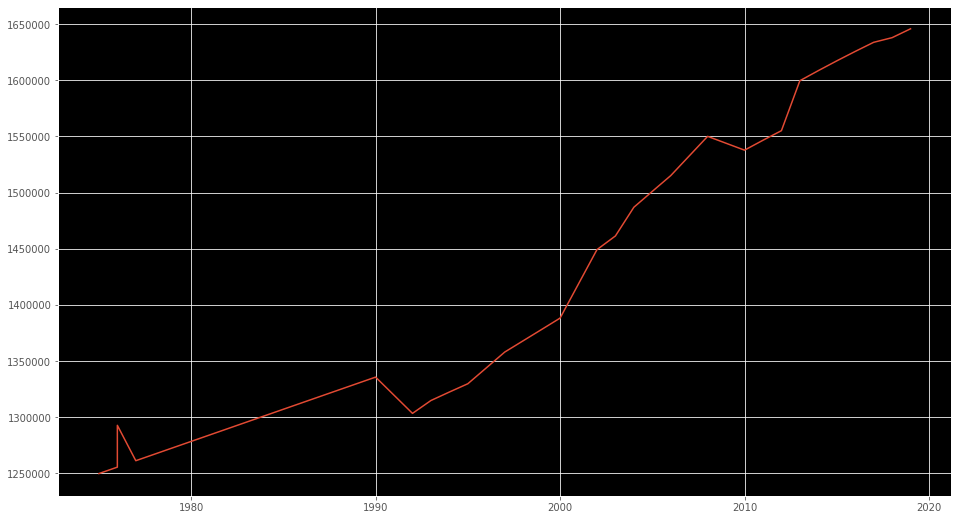

Variação de temperatura ao longo dos anos:


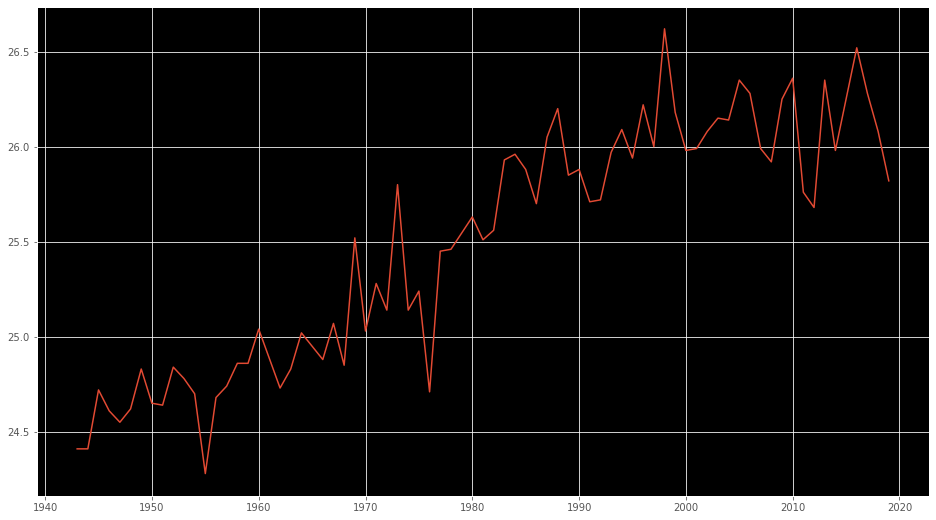

Salvador :
Variação populacional ao longo dos anos:


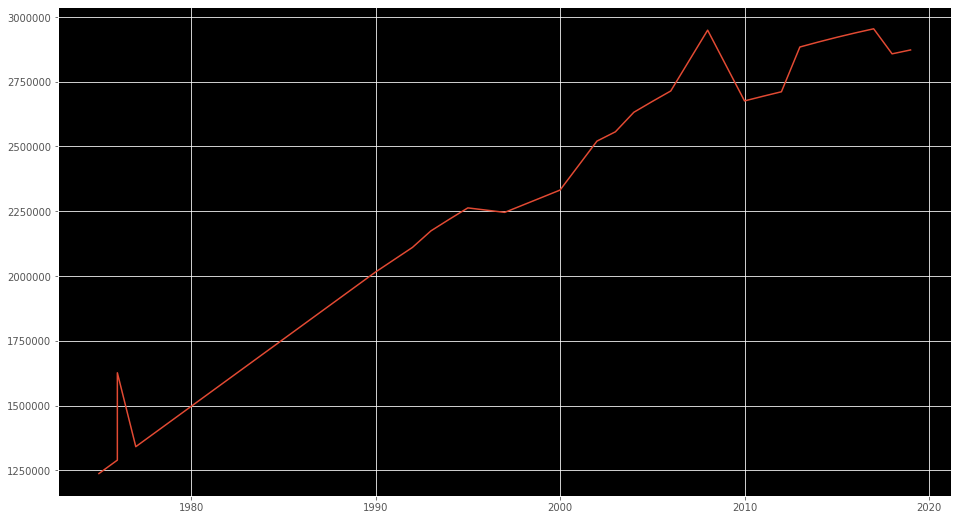

Variação de temperatura ao longo dos anos:


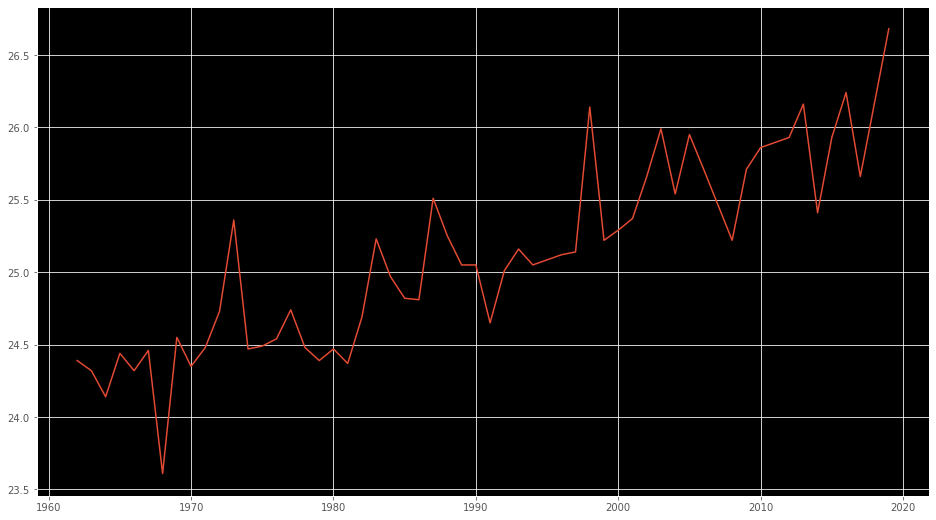

Fortaleza :
Variação populacional ao longo dos anos:


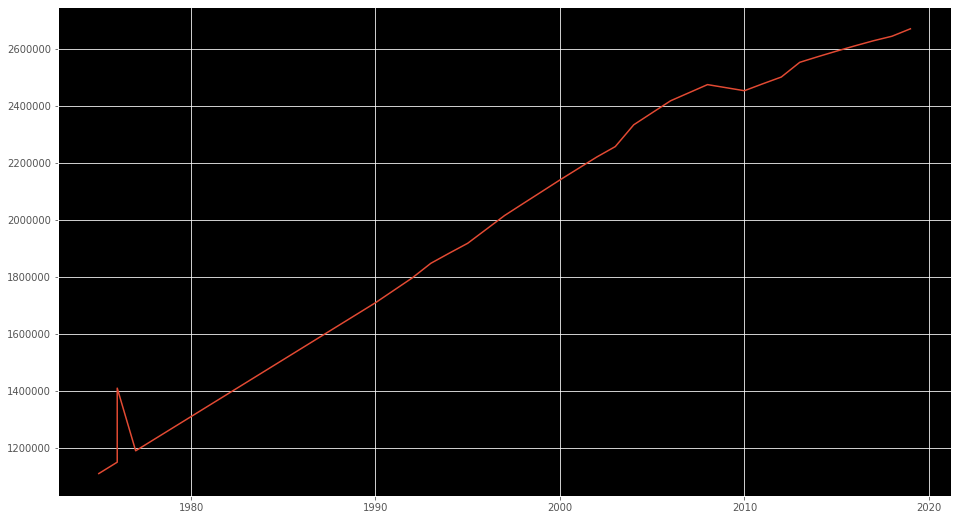

Variação de temperatura ao longo dos anos:


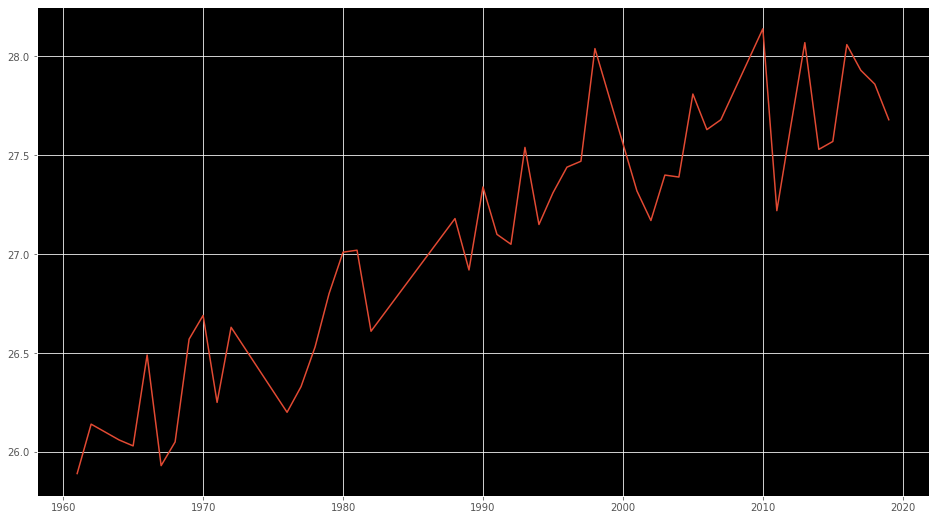

São Paulo :
Variação populacional ao longo dos anos:


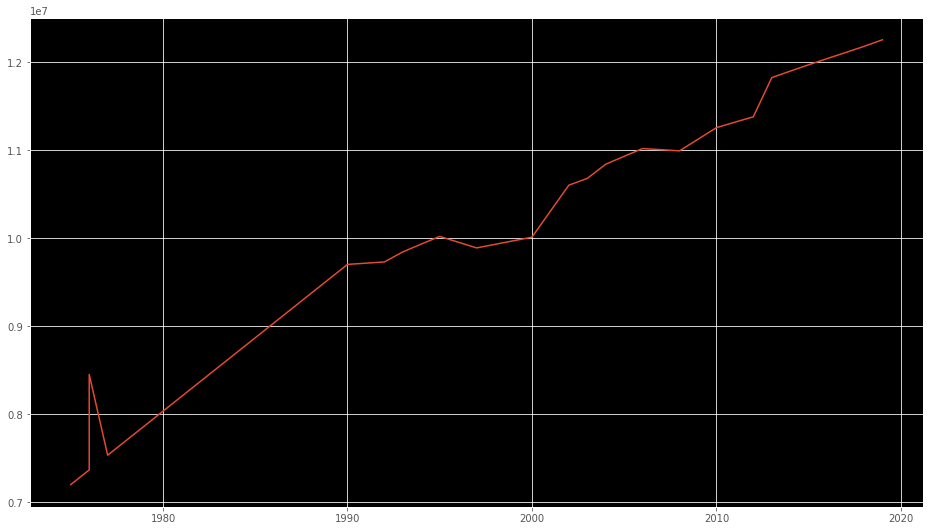

Variação de temperatura ao longo dos anos:


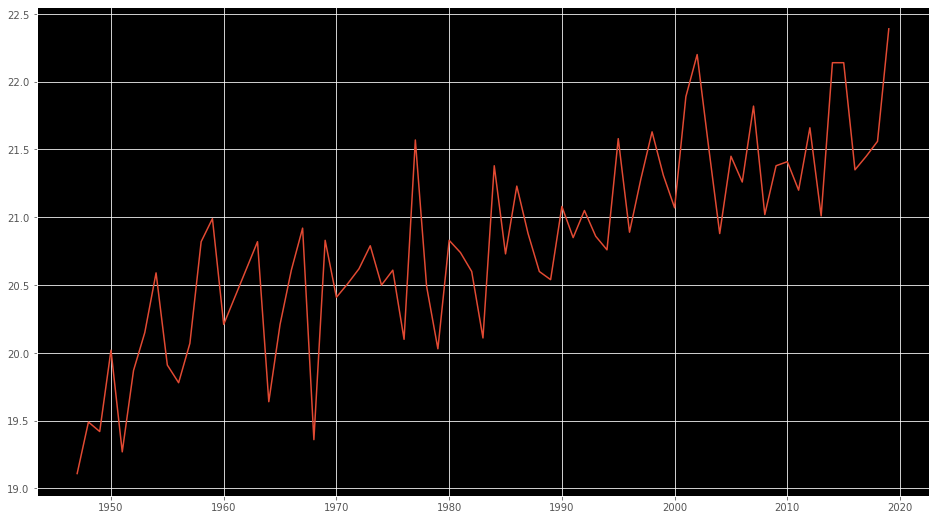

Rio de Janeiro :
Variação populacional ao longo dos anos:


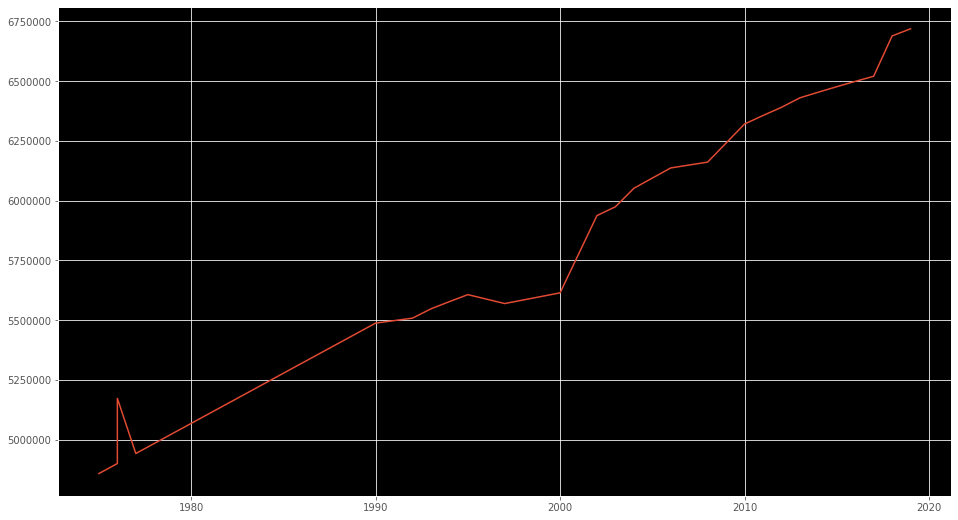

Variação de temperatura ao longo dos anos:


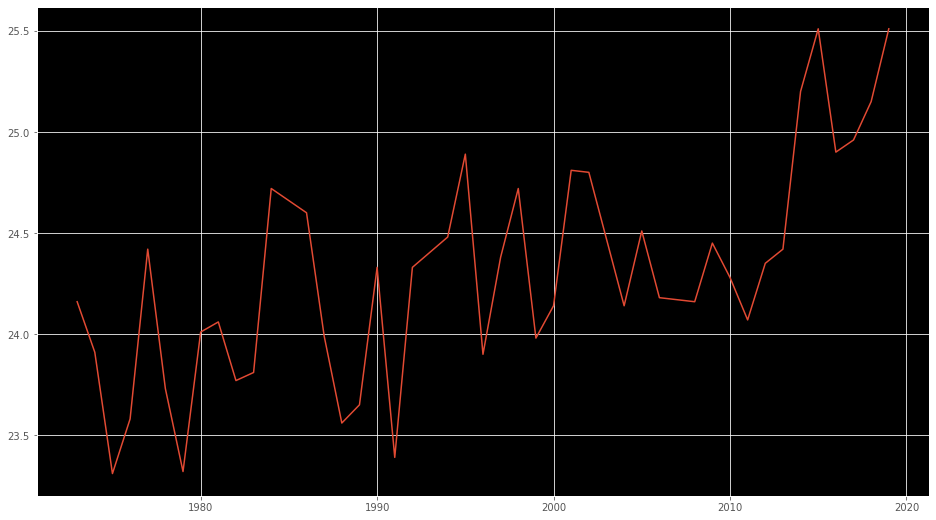

Vitória :
Variação populacional ao longo dos anos:


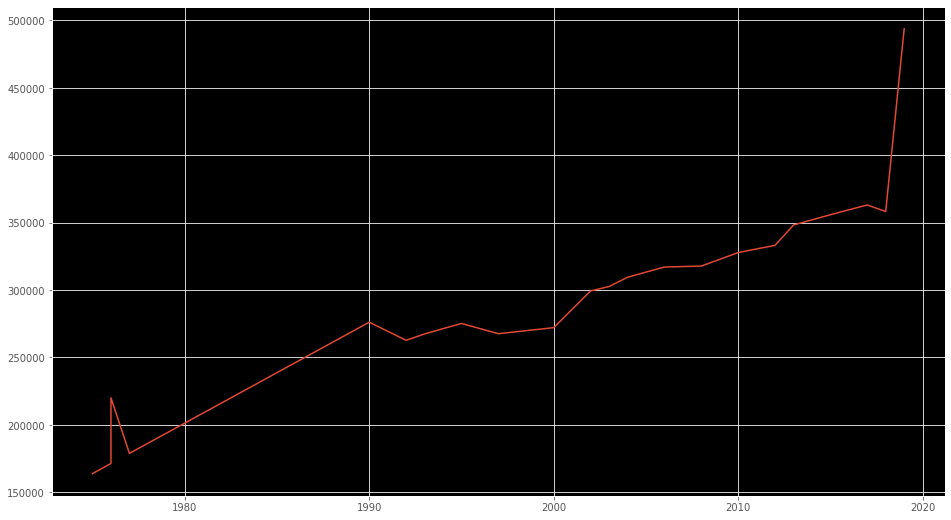

Variação de temperatura ao longo dos anos:


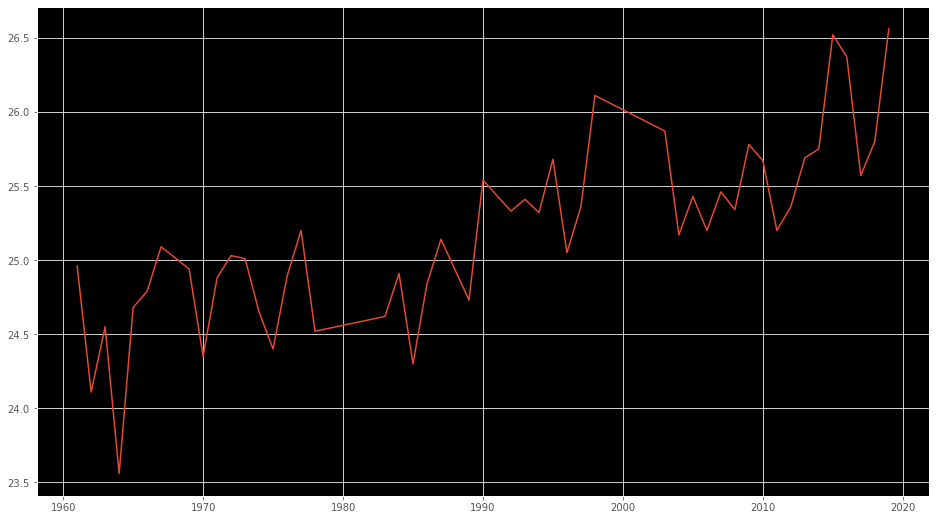

Belém :
Variação populacional ao longo dos anos:


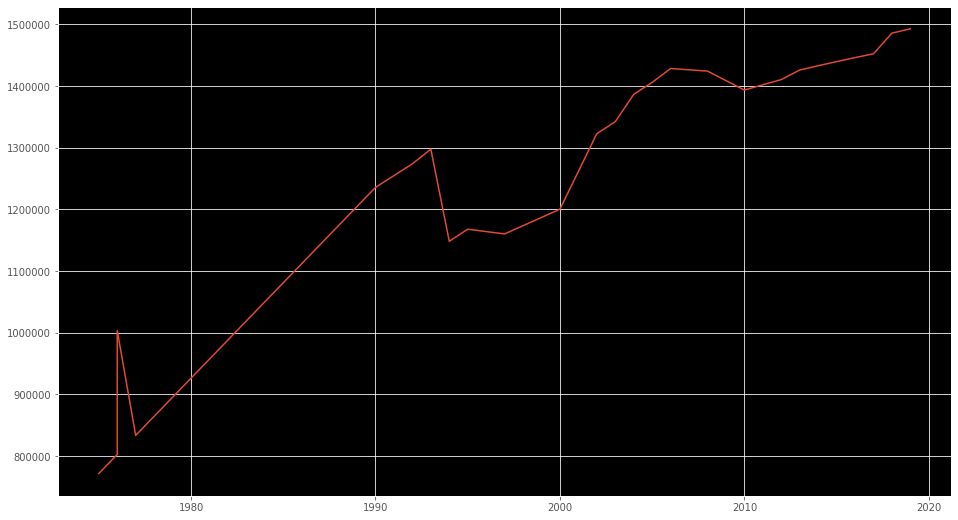

Variação de temperatura ao longo dos anos:


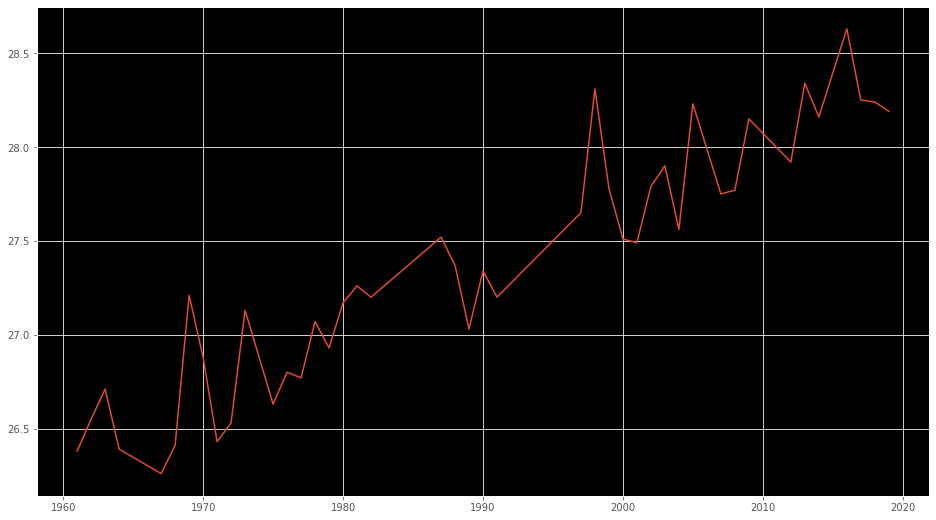

Manaus :
Variação populacional ao longo dos anos:


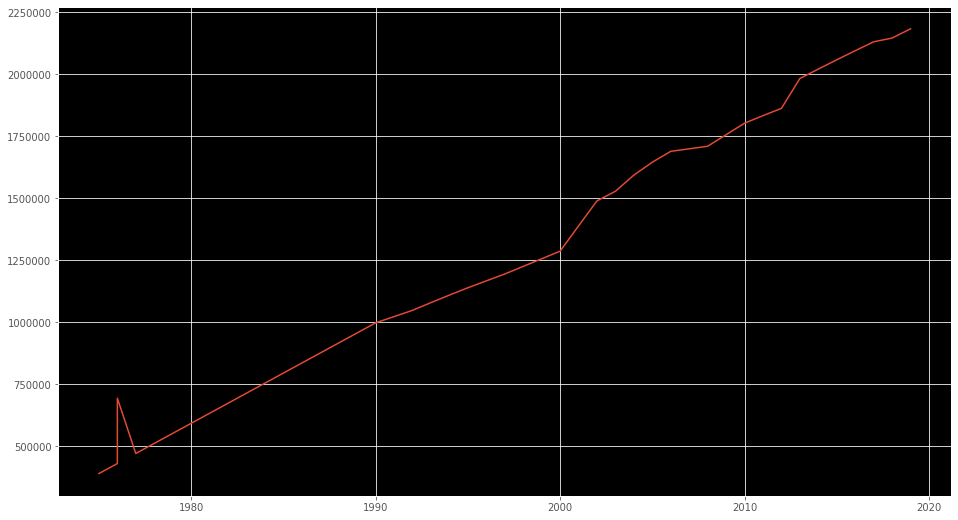

Variação de temperatura ao longo dos anos:


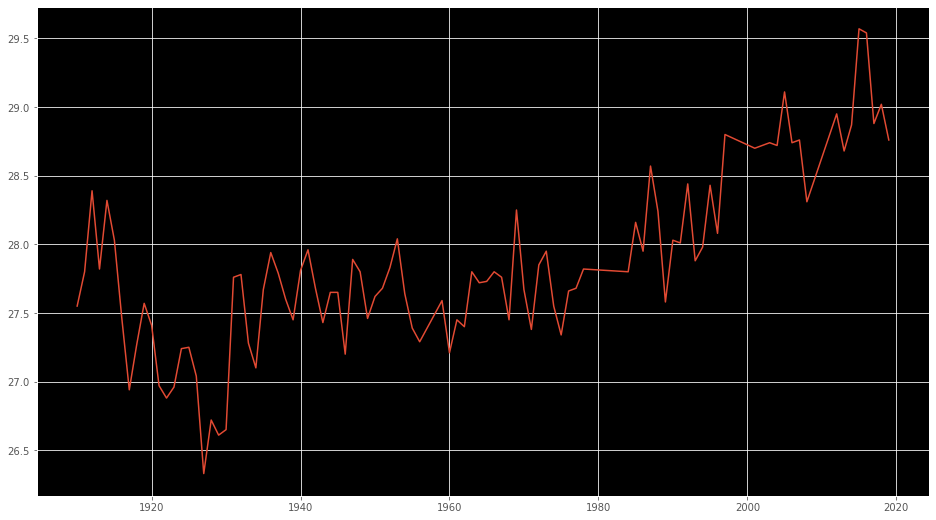

Macapá :
Variação populacional ao longo dos anos:


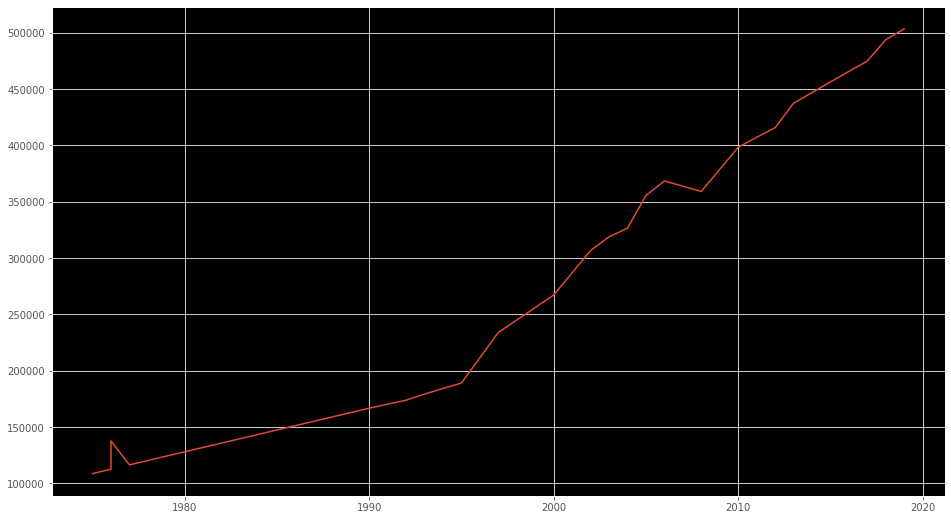

Variação de temperatura ao longo dos anos:


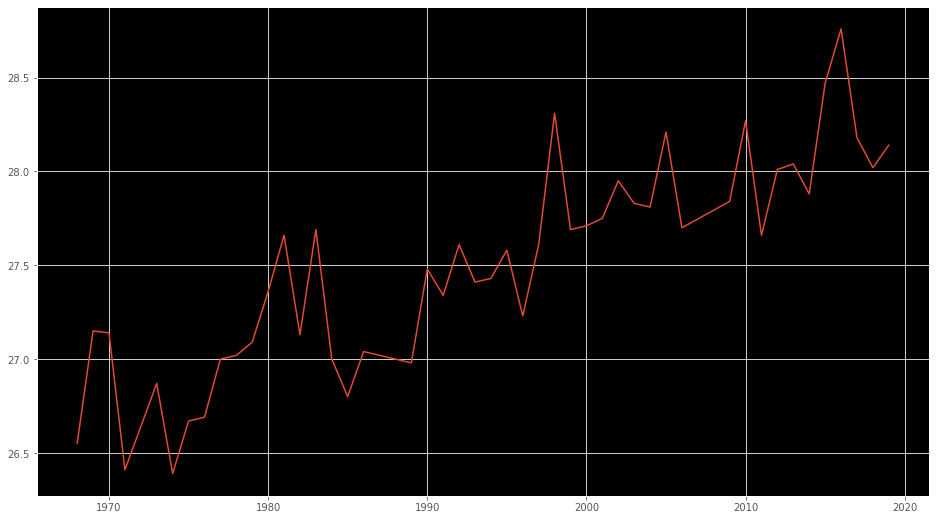

Curitiba :
Variação populacional ao longo dos anos:


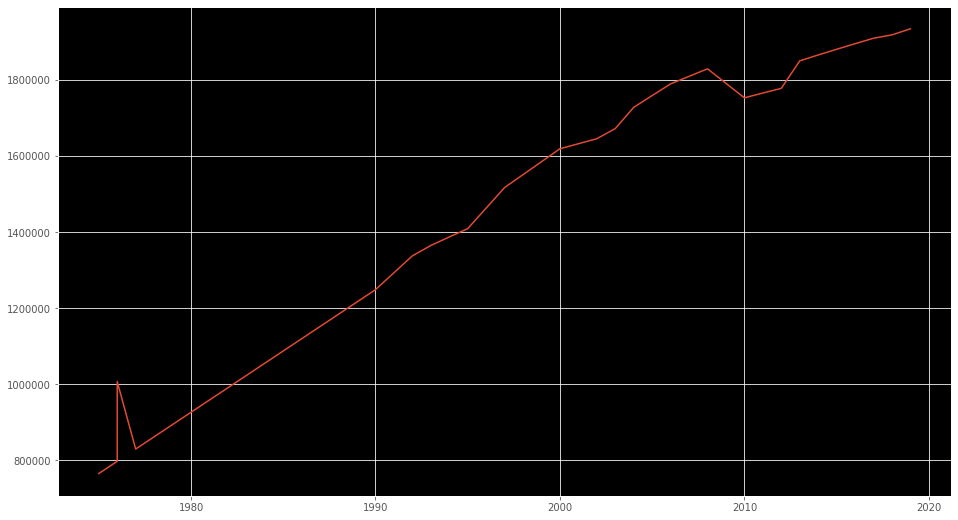

Variação de temperatura ao longo dos anos:


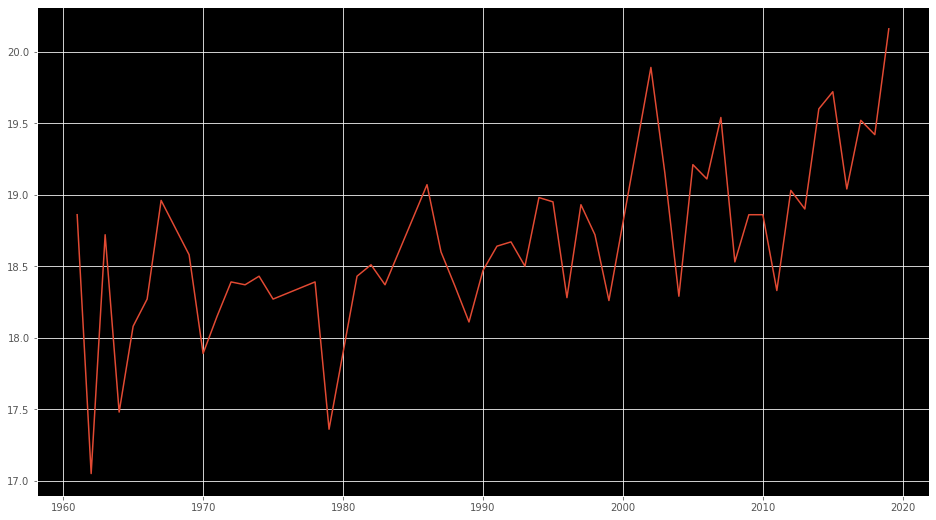

Goiania :
Variação populacional ao longo dos anos:


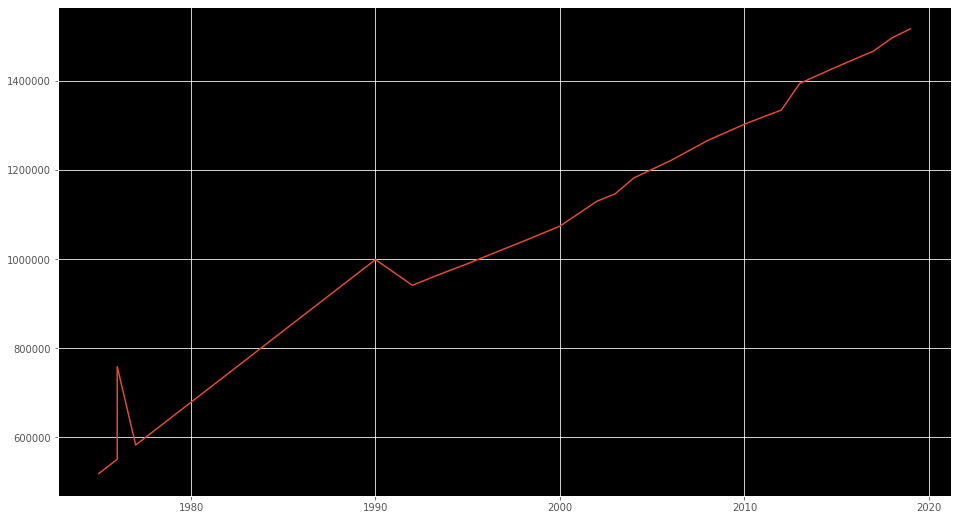

Variação de temperatura ao longo dos anos:


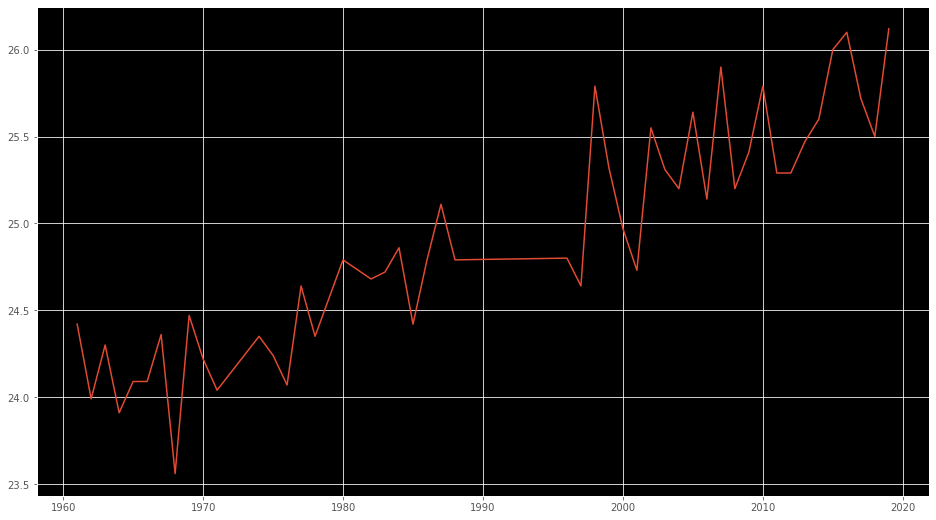

In [100]:
for i in range(len(cidades)):
    x = aux[i]["Ano"]
    y = aux[i]["População"]
    x2 = cidades[i]['YEAR']
    y2 = cidades[i]['metANN']
    print(listaCidades[i] + ' :')
    print('Variação populacional ao longo dos anos:')
    plt.plot(x, y)
    plt.show()
    print('Variação de temperatura ao longo dos anos:')
    plt.plot(x2, y2)
    plt.show()

Recife :
Variação populacional ao longo dos anos:


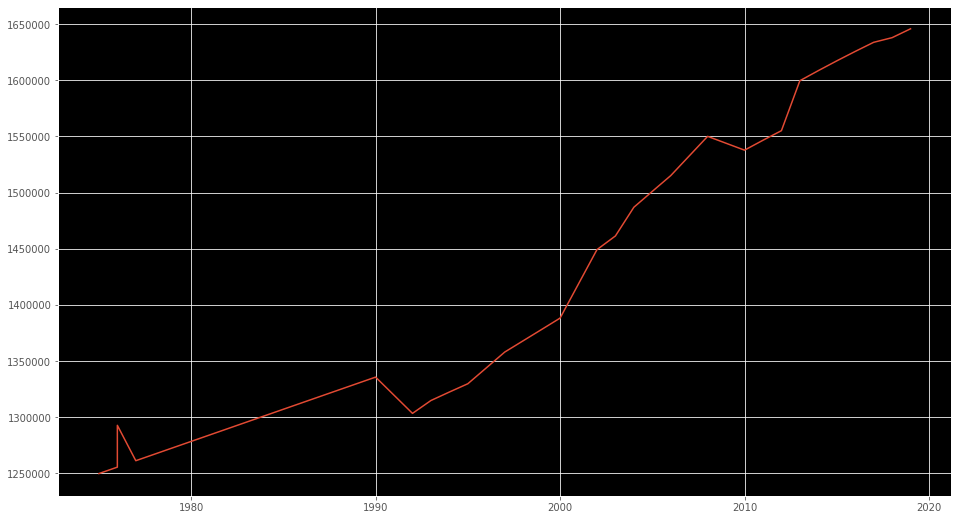

Variação de temperatura ao longo dos anos:


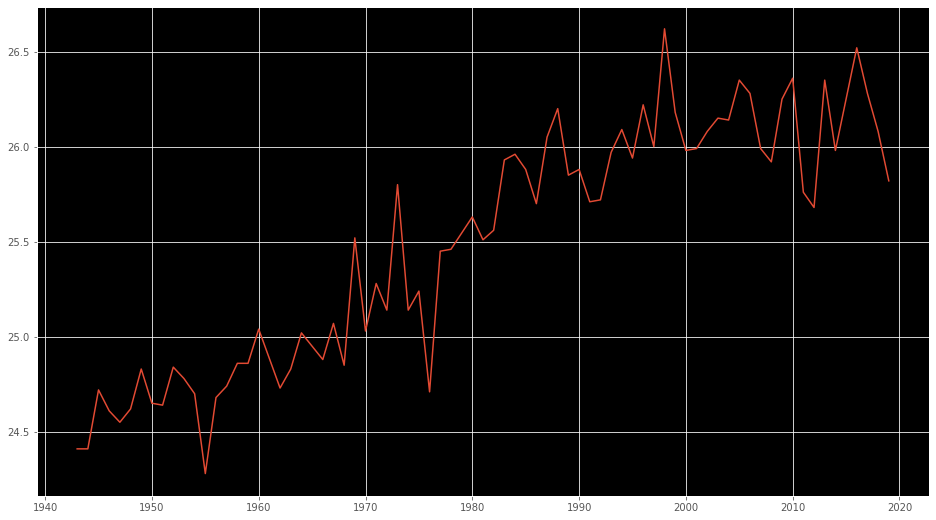

In [99]:
x = aux[0]["Ano"]
y = aux[0]["População"]
x2 = cidades[0]['YEAR']
y2 = cidades[0]['metANN']
print(listaCidades[0] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Salvador :
Variação populacional ao longo dos anos:


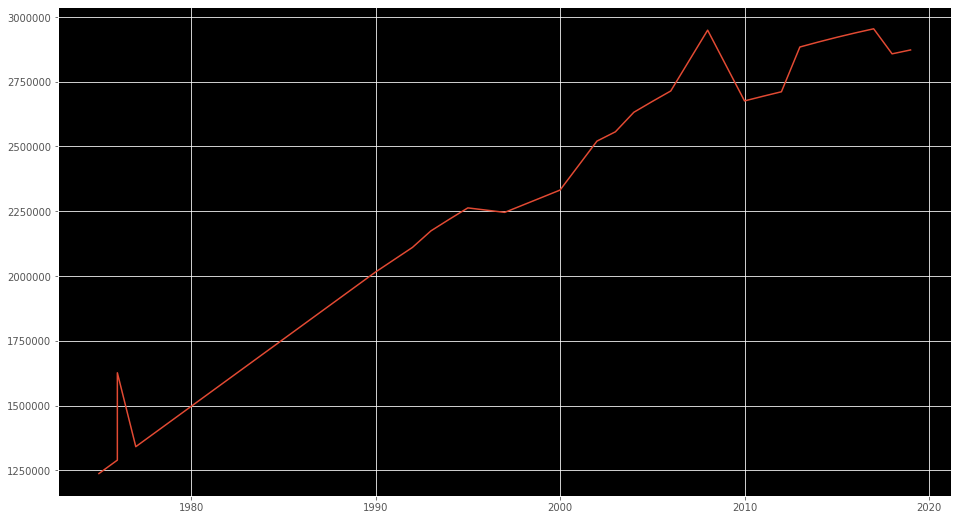

Variação de temperatura ao longo dos anos:


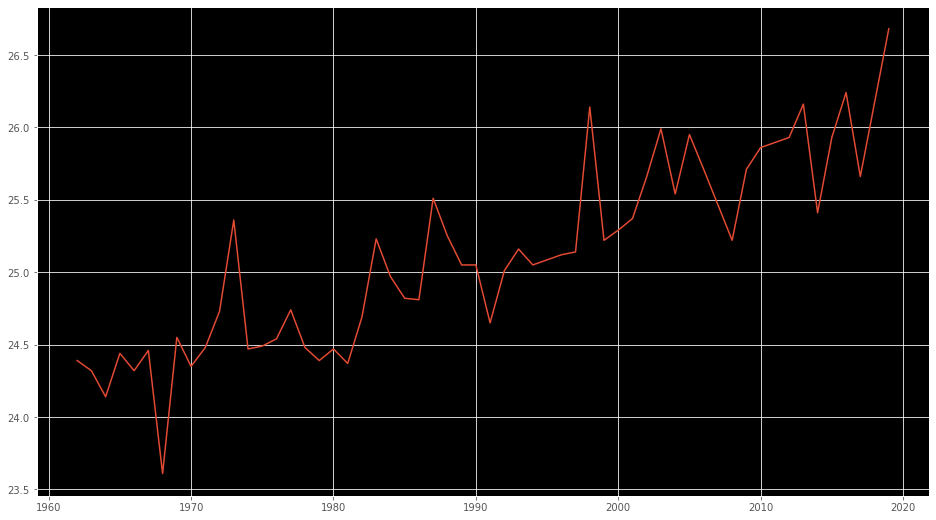

In [102]:
x = aux[1]["Ano"]
y = aux[1]["População"]
x2 = cidades[1]['YEAR']
y2 = cidades[1]['metANN']
print(listaCidades[1] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Fortaleza :
Variação populacional ao longo dos anos:


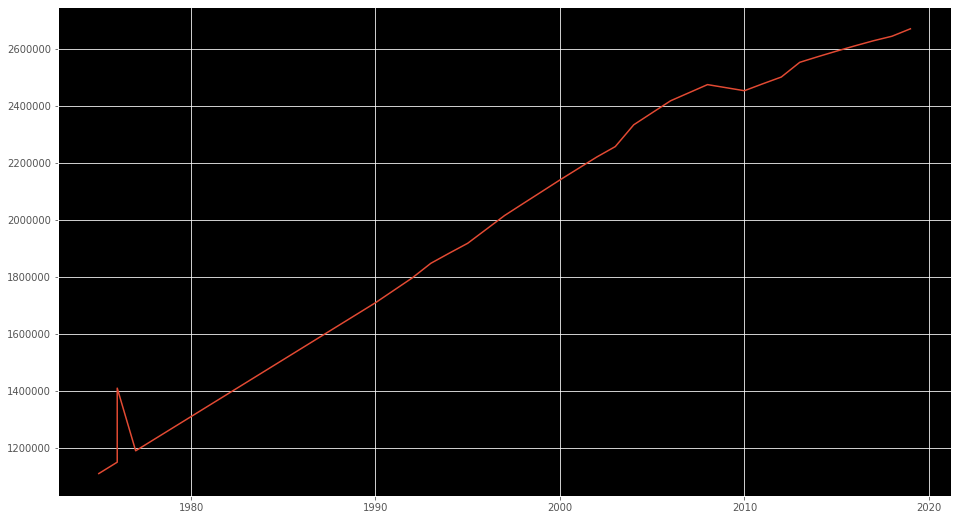

Variação de temperatura ao longo dos anos:


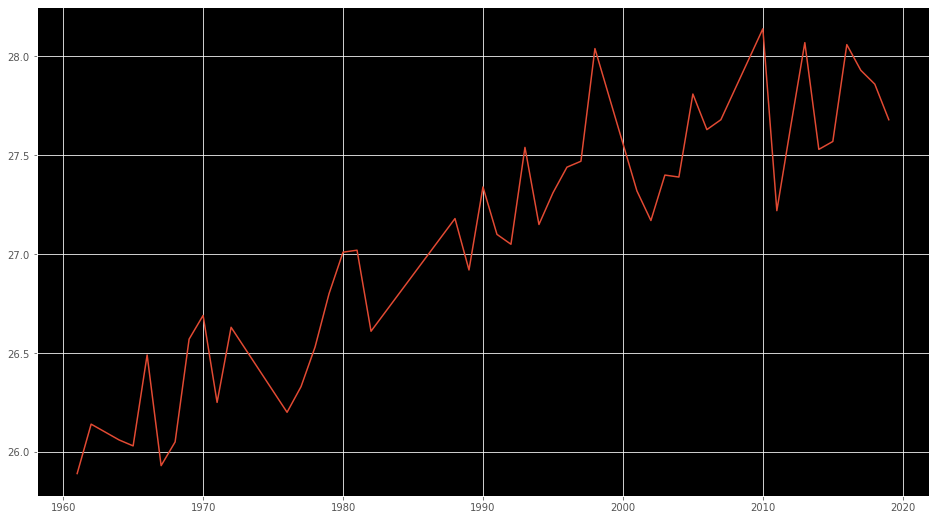

In [103]:
x = aux[2]["Ano"]
y = aux[2]["População"]
x2 = cidades[2]['YEAR']
y2 = cidades[2]['metANN']
print(listaCidades[2] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

São Paulo :
Variação populacional ao longo dos anos:


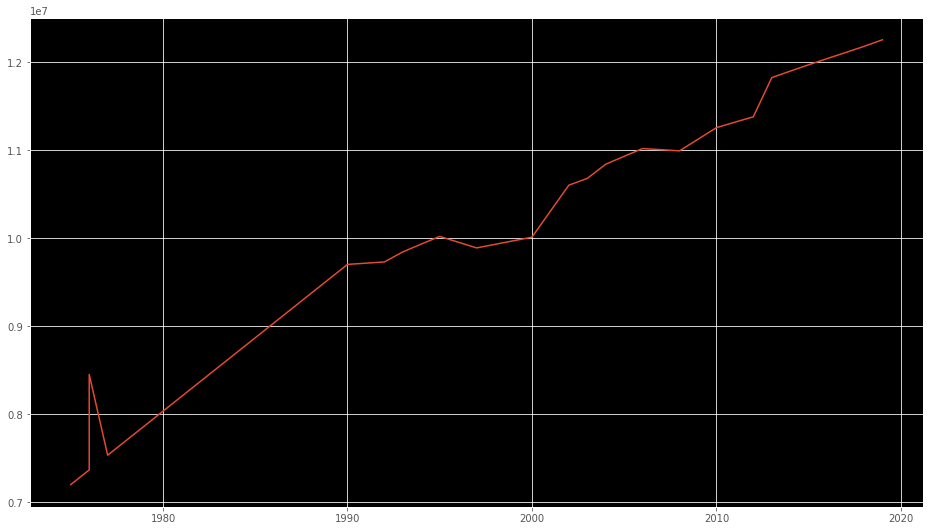

Variação de temperatura ao longo dos anos:


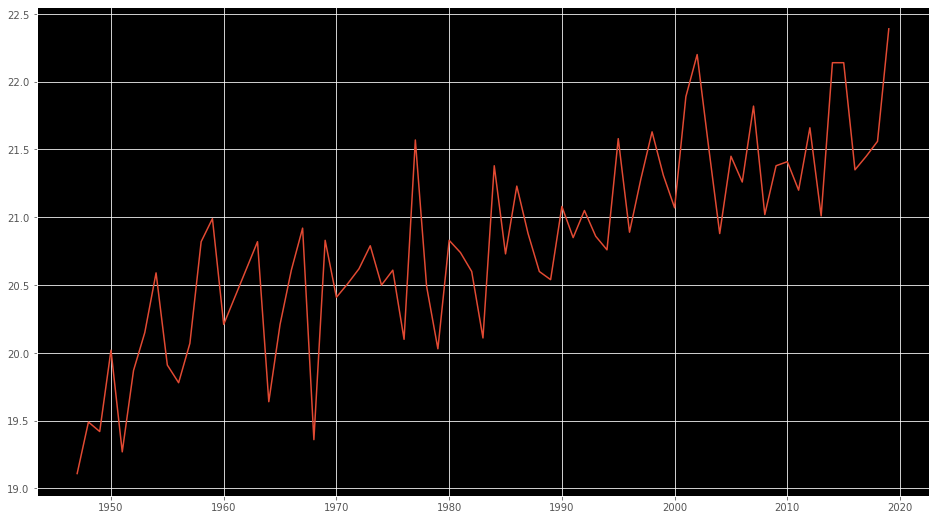

In [104]:
x = aux[3]["Ano"]
y = aux[3]["População"]
x2 = cidades[3]['YEAR']
y2 = cidades[3]['metANN']
print(listaCidades[3] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Rio de Janeiro :
Variação populacional ao longo dos anos:


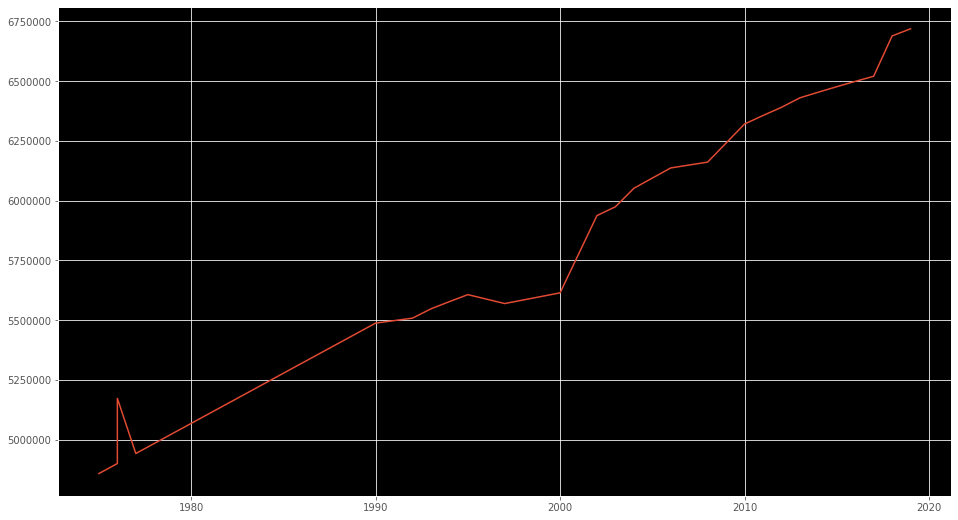

Variação de temperatura ao longo dos anos:


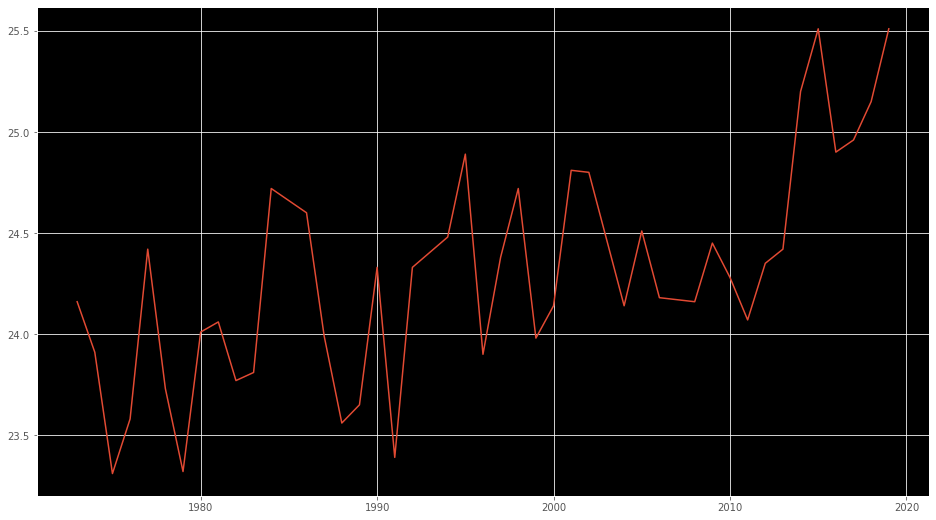

In [105]:
x = aux[4]["Ano"]
y = aux[4]["População"]
x2 = cidades[4]['YEAR']
y2 = cidades[4]['metANN']
print(listaCidades[4] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Vitória :
Variação populacional ao longo dos anos:


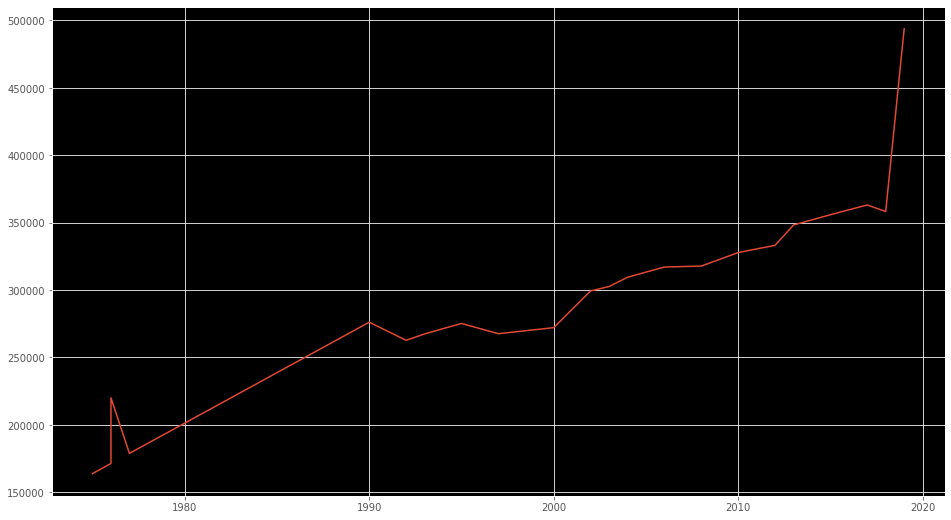

Variação de temperatura ao longo dos anos:


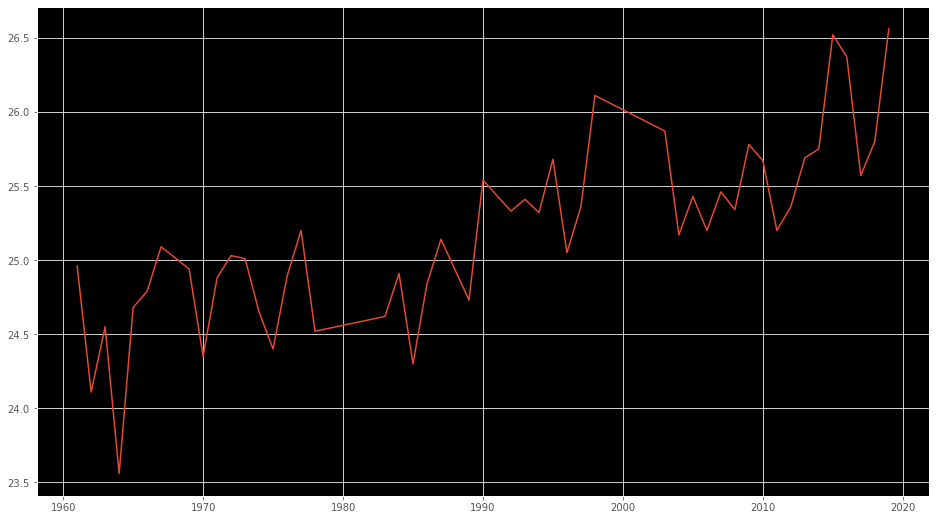

In [106]:
x = aux[5]["Ano"]
y = aux[5]["População"]
x2 = cidades[5]['YEAR']
y2 = cidades[5]['metANN']
print(listaCidades[5] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Belém :
Variação populacional ao longo dos anos:


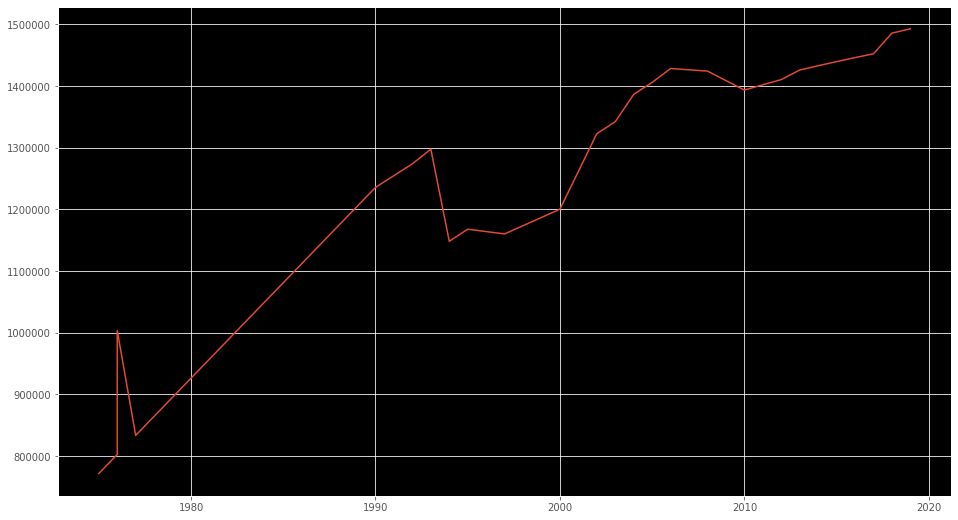

Variação de temperatura ao longo dos anos:


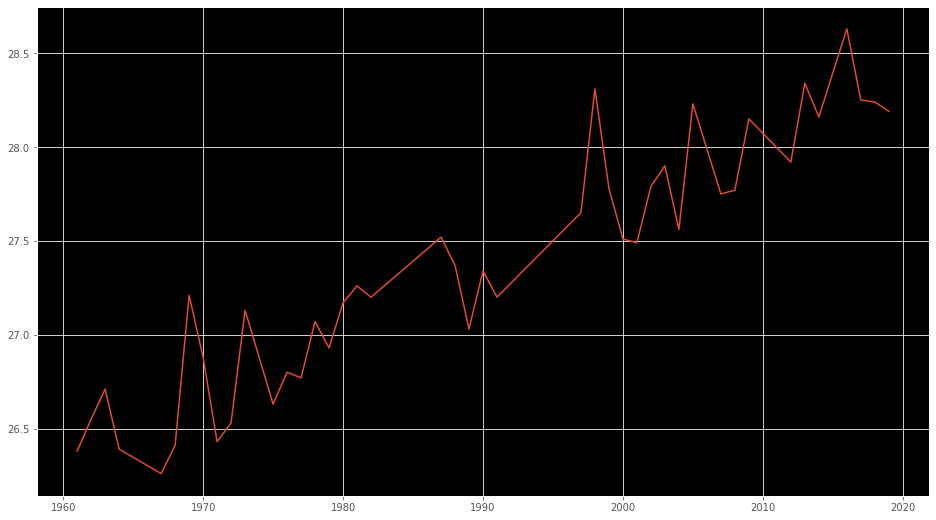

In [111]:
x = aux[6]["Ano"]
y = aux[6]["População"]
x2 = cidades[6]['YEAR']
y2 = cidades[6]['metANN']
print(listaCidades[6] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Manaus :
Variação populacional ao longo dos anos:


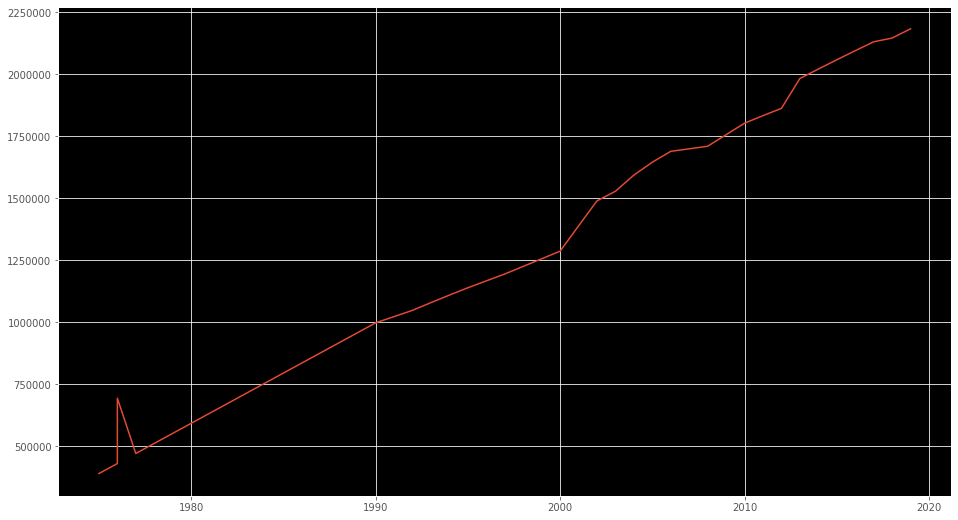

Variação de temperatura ao longo dos anos:


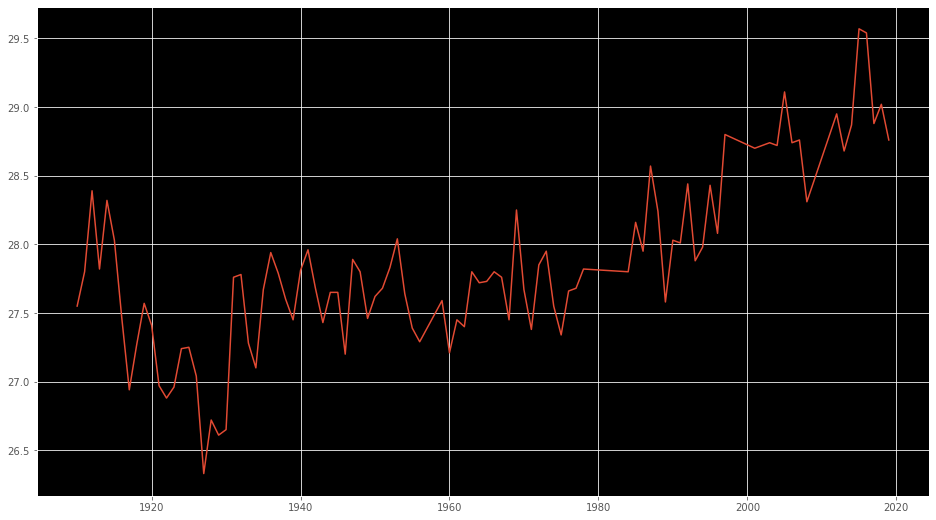

In [110]:
x = aux[7]["Ano"]
y = aux[7]["População"]
x2 = cidades[7]['YEAR']
y2 = cidades[7]['metANN']
print(listaCidades[7] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Macapá :
Variação populacional ao longo dos anos:


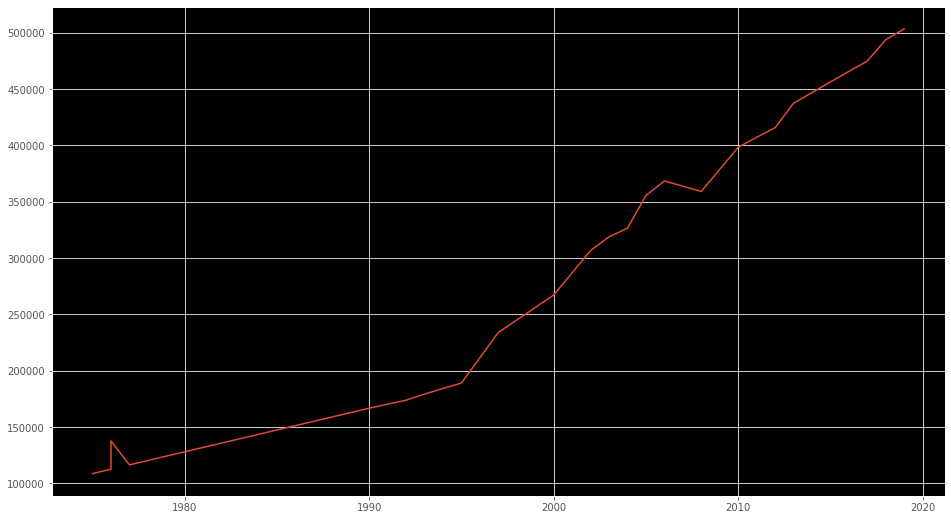

Variação de temperatura ao longo dos anos:


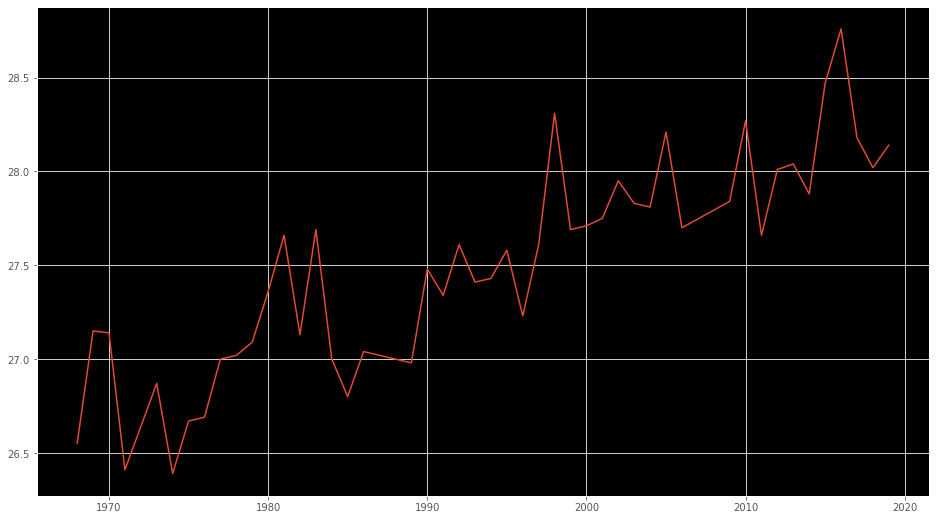

In [112]:
x = aux[8]["Ano"]
y = aux[8]["População"]
x2 = cidades[8]['YEAR']
y2 = cidades[8]['metANN']
print(listaCidades[8] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Curitiba :
Variação populacional ao longo dos anos:


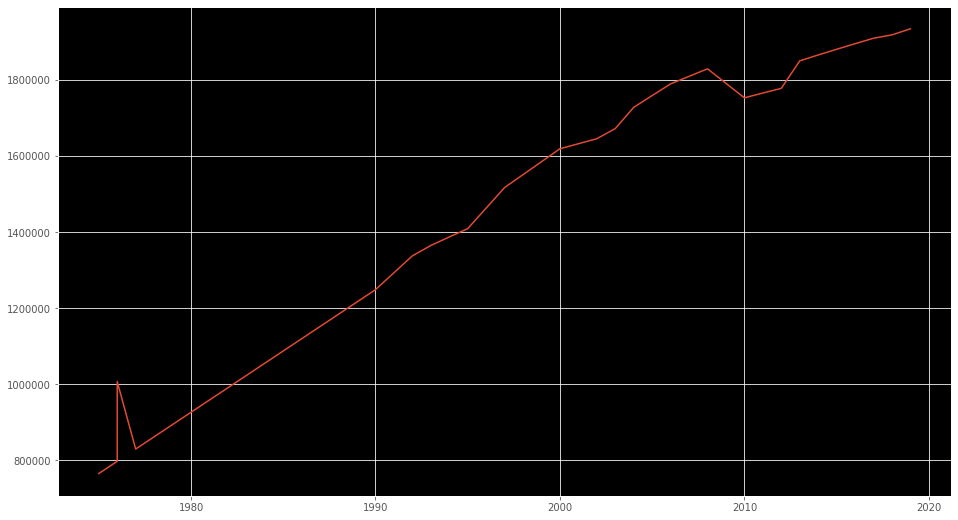

Variação de temperatura ao longo dos anos:


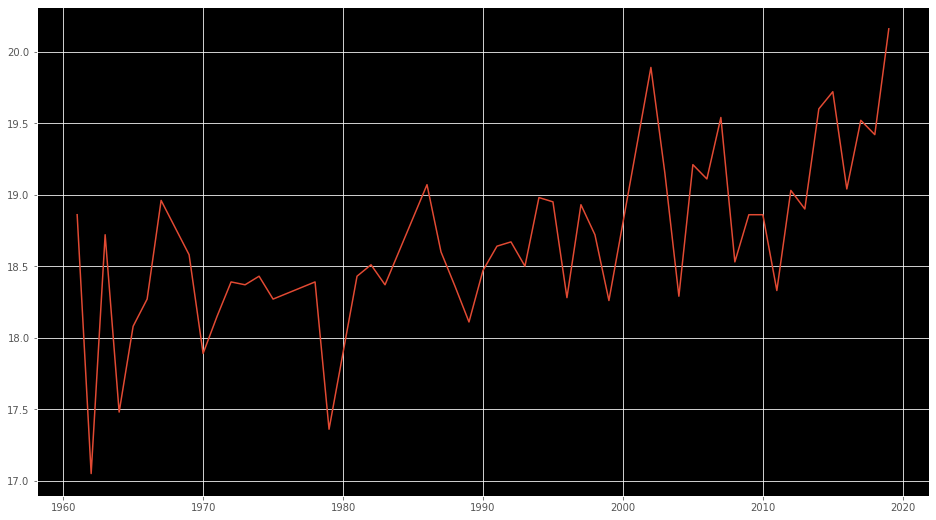

In [107]:
x = aux[9]["Ano"]
y = aux[9]["População"]
x2 = cidades[9]['YEAR']
y2 = cidades[9]['metANN']
print(listaCidades[9] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()

Goiania :
Variação populacional ao longo dos anos:


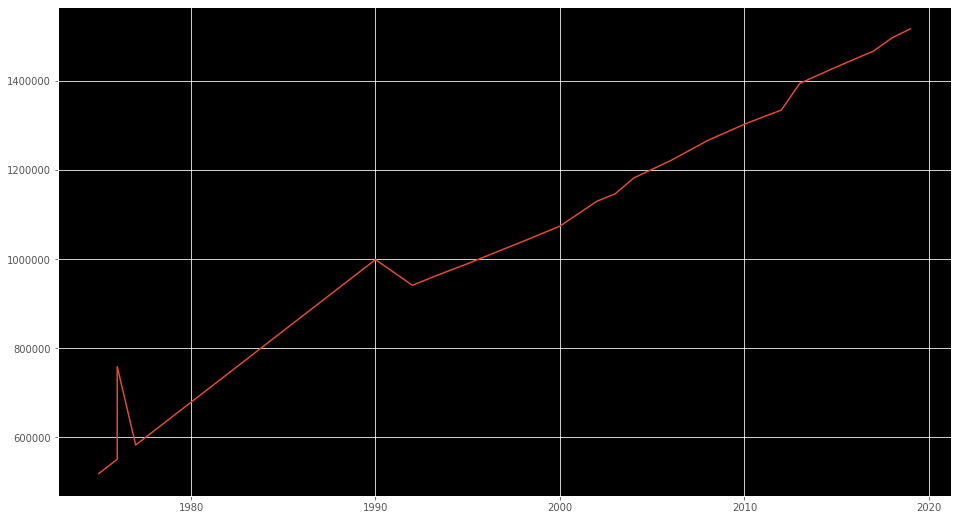

Variação de temperatura ao longo dos anos:


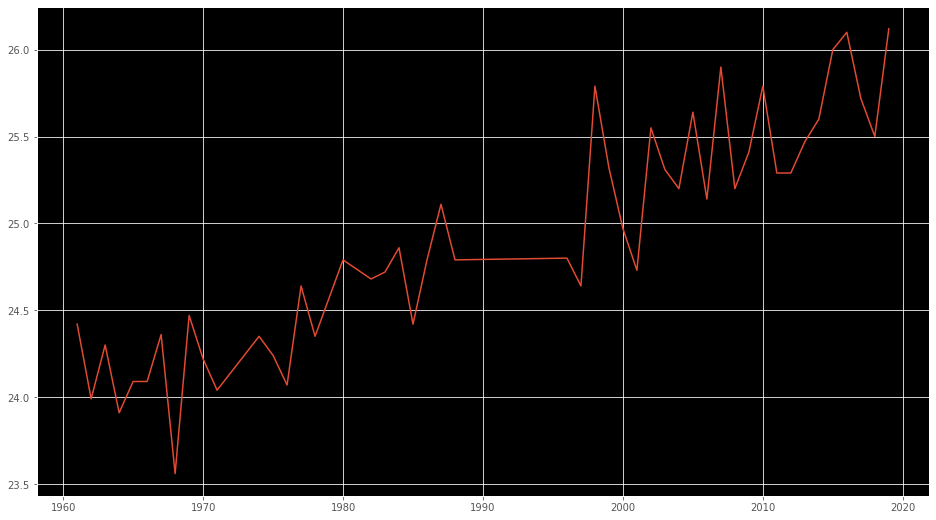

In [108]:
x = aux[10]["Ano"]
y = aux[10]["População"]
x2 = cidades[10]['YEAR']
y2 = cidades[10]['metANN']
print(listaCidades[10] + ' :')
print('Variação populacional ao longo dos anos:')
plt.plot(x, y)
plt.show()
print('Variação de temperatura ao longo dos anos:')
plt.plot(x2, y2)
plt.show()